--- Step 1: Loading Dataset and Initial Inspection ---

Successfully loaded 'Bangladeshi_Student_Database.xlsx'.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        500 non-null    object 
 1   Age         425 non-null    float64
 2   Exam Marks  400 non-null    float64
 3   Gender      450 non-null    object 
dtypes: float64(2), object(2)
memory usage: 15.8+ KB

Summary Statistics:
              Age  Exam Marks
count  425.000000  400.000000
mean    19.992941   50.207500
std      1.358914   29.642641
min     18.000000    0.000000
25%     19.000000   23.000000
50%     20.000000   50.000000
75%     21.000000   75.250000
max     22.000000  100.000000

--- Data Prep: Handling Missing Values for Visualization ---
Gender column encoded with mapping: {'Male': 0, 'Female': 1, 'Others': 2}

--- Step 2: Distribution Plots ---


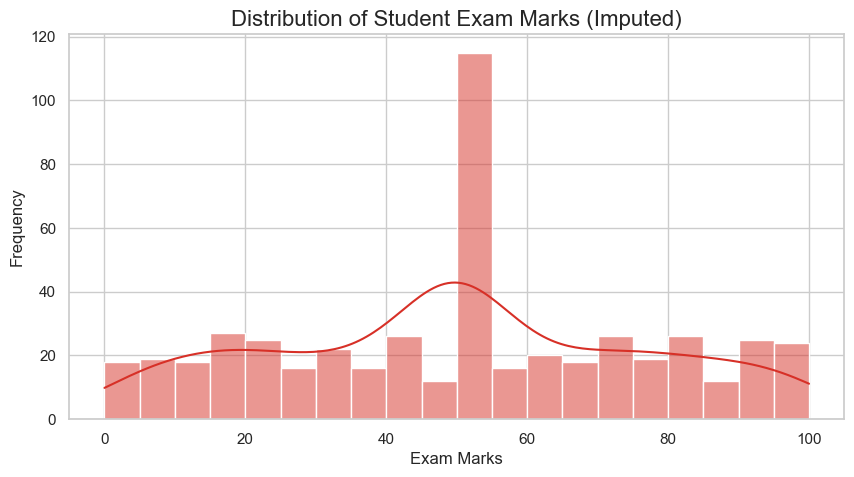


--- Step 3: Boxplot for Outlier Detection by Gender ---



--- Step 4: Pairplot of Numerical Features by Gender ---


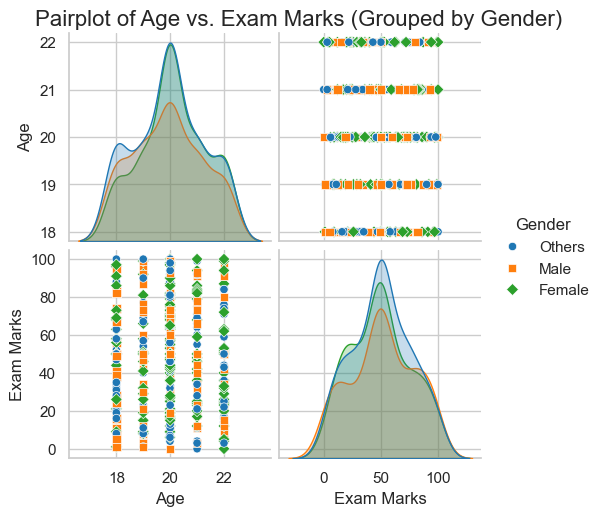


--- Step 5: Correlation Heatmap ---



--- Step 6: Countplot for Gender Distribution ---


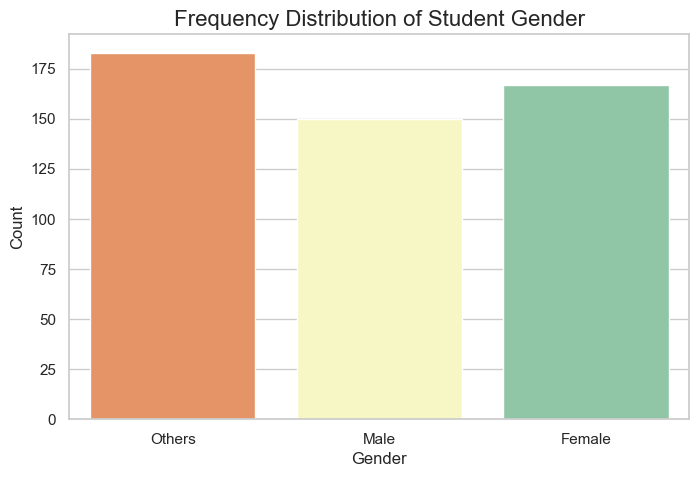


--- EDA Complete ---
The exploratory data analysis successfully generated visualizations for distribution,
relationships, and feature correlations in the student dataset.


In [4]:
# Experiment 3: Exploratory Data Analysis (EDA) using Seaborn
# This script performs EDA on the provided 'Bangladeshi_Student_Database' CSV file.

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Set a pleasant style for all plots
sns.set_theme(style="whitegrid")

# Define the file path for the student dataset
CSV_FILENAME = 'Bangladeshi_Student_Database.xlsx'

# ----------------------------------------------------------------------
# Step 1: Load Data and Initial Inspection
# ----------------------------------------------------------------------
print("--- Step 1: Loading Dataset and Initial Inspection ---")
try:
    df = pd.read_excel(CSV_FILENAME)
    # Clean column names by stripping whitespace (Crucial step for CSVs)
    df.columns = df.columns.str.strip()
    print(f"\nSuccessfully loaded '{CSV_FILENAME}'.")
except FileNotFoundError:
    print(f"\nError: The file '{CSV_FILENAME}' was not found. Please check the path.")
    exit()

# Display basic information (data types, non-null counts)
print("\nDataset Info:")
df.info()

# Display summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# ----------------------------------------------------------------------
# Data Preparation: Handle Missing/Inconsistent Data for EDA
# --- EDA plots (like pairplot/heatmap) often fail with NaNs, so we impute here.
# --- We will use median/mean imputation for the sake of visualization simplicity.
# ----------------------------------------------------------------------
print("\n--- Data Prep: Handling Missing Values for Visualization ---")
# Impute Age (numerical) with the mean
age_mean = df['Age'].mean()
df['Age_Imputed'] = df['Age'].fillna(age_mean)

# Impute Exam Marks (numerical) with the median
marks_median = df['Exam Marks'].median()
df['Exam Marks_Imputed'] = df['Exam Marks'].fillna(marks_median)

# Fill missing Gender values with 'Unknown' for encoding
df['Gender_Imputed'] = df['Gender'].fillna('Others')

# NEW REQUIREMENT: Apply Label Encoding to the Gender column
# This converts categorical text into numerical labels.
gender_mapping = {
    'Male': 0,
    'Female': 1,
    'Others': 2,
}
df['Gender_Encoded'] = df['Gender_Imputed'].map(gender_mapping)
print(f"Gender column encoded with mapping: {gender_mapping}")
# ----------------------------------------------------------------------
# Step 2: Distribution Plot (Univariate Analysis)
# ----------------------------------------------------------------------

print("\n--- Step 2: Distribution Plots ---")

# 2a. Distribution plot of Age
plt.figure(figsize=(10, 5))
sns.histplot(df['Age_Imputed'], kde=True, color='#2c7bb6', bins=10)
plt.title("Distribution of Student Age (Imputed)", fontsize=16)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# 2b. Distribution plot of Exam Marks
plt.figure(figsize=(10, 5))
sns.histplot(df['Exam Marks_Imputed'], kde=True, color='#d73027', bins=20)
plt.title("Distribution of Student Exam Marks (Imputed)", fontsize=16)
plt.xlabel("Exam Marks")
plt.ylabel("Frequency")
plt.show()

# ----------------------------------------------------------------------
# Step 3: Boxplot (Outlier Detection and Category Comparison)
# ----------------------------------------------------------------------

print("\n--- Step 3: Boxplot for Outlier Detection by Gender ---")
plt.figure(figsize=(10, 6))
# Boxplot to compare 'Exam Marks' across different 'Gender' categories
sns.boxplot(x='Gender_Encoded', y='Exam Marks_Imputed', data=df, palette='viridis', hue='Gender_Encoded', legend=False)
plt.title("Boxplot of Exam Marks by Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Exam Marks")
plt.show()

# ----------------------------------------------------------------------
# Step 4: Pairplot (Pairwise Relationship Visualization)
# ----------------------------------------------------------------------

print("\n--- Step 4: Pairplot of Numerical Features by Gender ---")
# Create a temporary dataframe with only the features we want to visualize in pairplot
df_pair = df[['Age_Imputed', 'Exam Marks_Imputed', 'Gender_Imputed']].rename(columns={
    'Age_Imputed': 'Age',
    'Exam Marks_Imputed': 'Exam Marks',
    'Gender_Imputed': 'Gender'
})

# Use pairplot to visualize the relationship between Age and Exam Marks, colored by Gender
sns.pairplot(df_pair, hue='Gender', palette='tab10', markers=["o", "s", "D"])
plt.suptitle("Pairplot of Age vs. Exam Marks (Grouped by Gender)", y=1.02, fontsize=16)
plt.show()

# ----------------------------------------------------------------------
# Step 5: Correlation Heatmap (Feature Relationship Strength)
# ----------------------------------------------------------------------

print("\n--- Step 5: Correlation Heatmap ---")
# Calculate the correlation matrix using the imputed numerical columns
corr = df[['Age_Imputed', 'Exam Marks_Imputed']].corr(numeric_only=True)

plt.figure(figsize=(6, 5))
# Create the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, linecolor='black')
plt.title("Correlation Heatmap (Age vs. Exam Marks)", fontsize=16)
plt.show()

# ----------------------------------------------------------------------
# Step 6: Categorical Countplot (Frequency of Gender)
# ----------------------------------------------------------------------

print("\n--- Step 6: Countplot for Gender Distribution ---")
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender_Imputed', data=df, hue='Gender_Imputed', palette='Spectral', legend=False)
plt.title("Frequency Distribution of Student Gender", fontsize=16)
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

# ----------------------------------------------------------------------
# Conclusion
# ----------------------------------------------------------------------
print("\n--- EDA Complete ---")
print("The exploratory data analysis successfully generated visualizations for distribution,")
print("relationships, and feature correlations in the student dataset.")
